In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


**Shopping dataset:**
**Problem statement:**
To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people

Questions-
1. Preprocessing of data as required
2. Univariate Analysis: Plot histograms or box plots for each numerical feature to identify outliers and distribution shapes.
3. Correlation Analysis: Calculate correlations between numerical features to identify potential relationships.
4. Visualizations: Use scatter plots, pair plots, or heatmaps to visualize relationships between numerical features.
5. Class Distribution: Check the distribution of the target variable ('Revenue') to understand class balance.
6. Summarize page views, durations, and bounce/exit rates for each page category.
7. Analyze SpecialDay distribution and its correlation with Revenue.
8. Generate a binary feature indicating whether the user visited all three page categories.
9. Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region.
10. Investigate user session lengths and their impact on conversion rates.
11. Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.
12. Segment users based on TrafficType and analyze their engagement patterns and purchase probability.

In [3]:
df=pd.read_csv("shopping.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [18]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

1. no null values

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


1. The 'Administrative', 'Informational', 'Product Related', and their respective duration attributes show a wide range of values. This suggests a significant variation in how different visitors interact with the website. For instance, 'Product Related' visits range from 0 to 705, indicating diverse visitor engagement levels.

2. The 'Administrative Duration', 'Informational Duration', and 'Product Related Duration' have high standard deviations compared to their means, suggesting that the time spent on these pages varies greatly among users.

3. The 'Bounce Rates' and 'Exit Rates' are relatively low on average but with notable variability (standard deviation close to the mean). This indicates that while most pages perform well in retaining visitors, some pages might be causing visitors to leave.

4. The 'Page Values' attribute, which indicates the average value of a web page in the path to a transaction, varies greatly (mean of 5.89 but a high standard deviation of 18.57), suggesting that some pages are much more influential in leading to sales.

5. The 'Special Day' feature has a low mean (0.061), indicating that most visits are not near special days. However, further analysis might reveal spikes in transactions or visits near specific date

**Univariate Analysis**

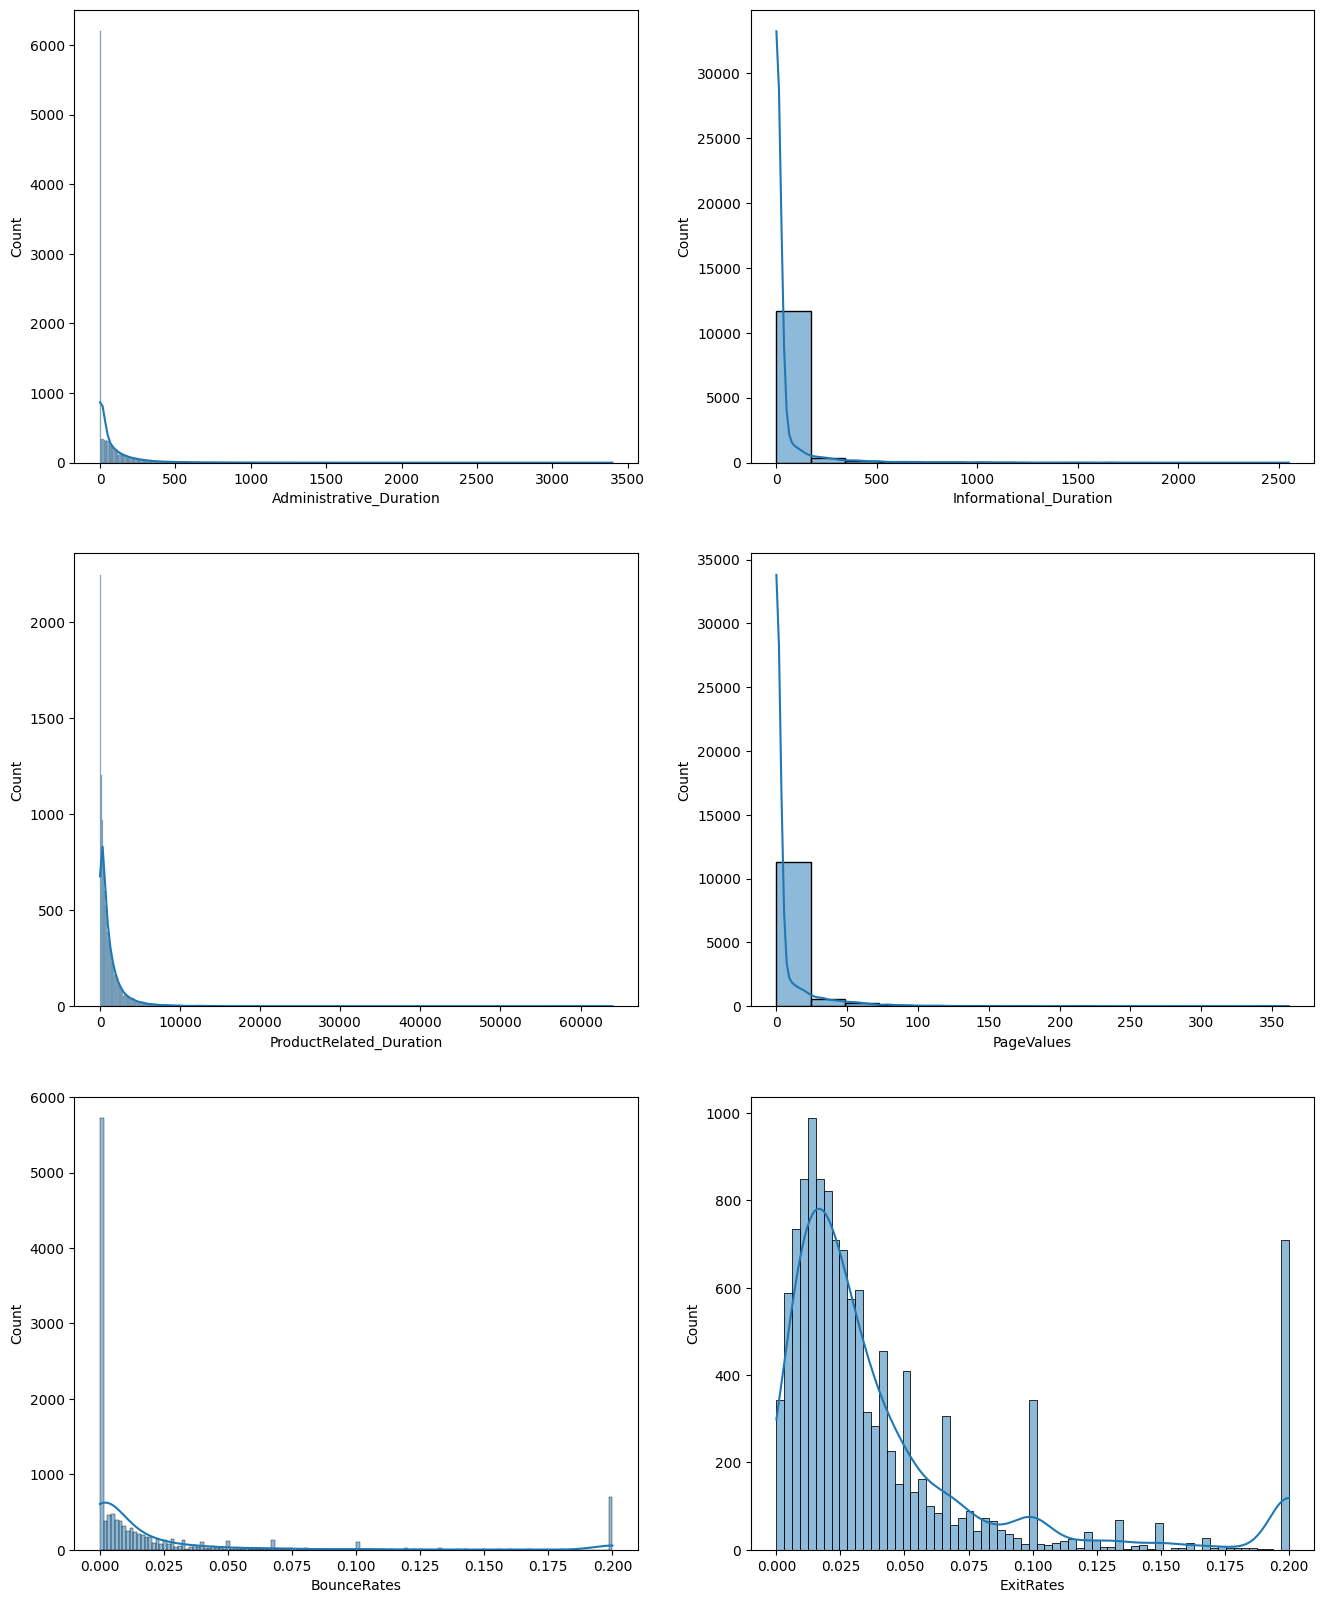

In [64]:
#checking distribution of differenct numerical categories

num_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues', 'BounceRates','ExitRates']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
index = 0
for row in range(3):
  for col in range(2):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()


More and less all numerical categorieg follows exponetial distribution except ExitRate

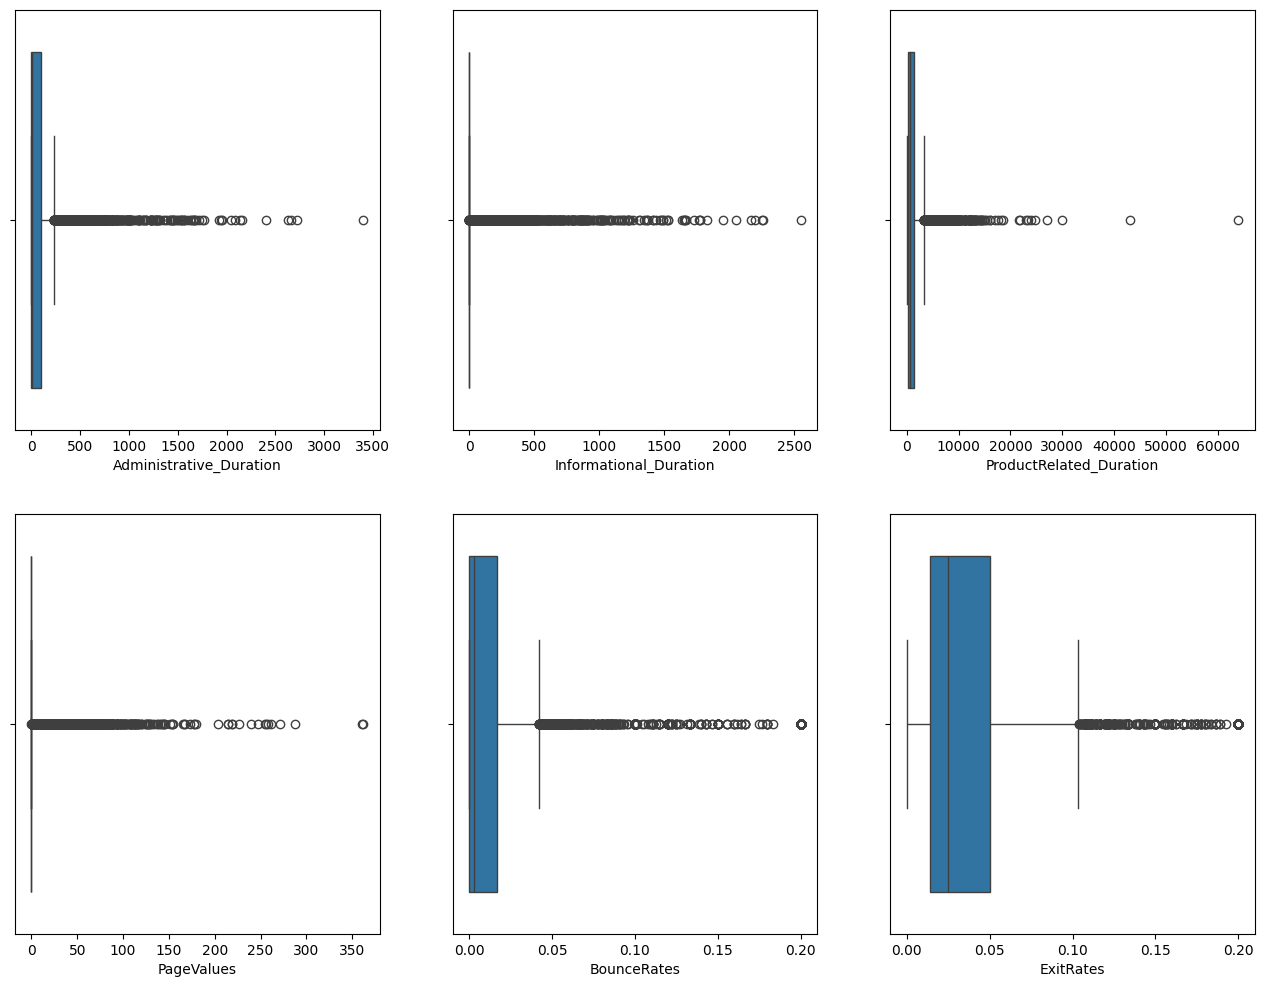

In [51]:
#checking outliers

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()

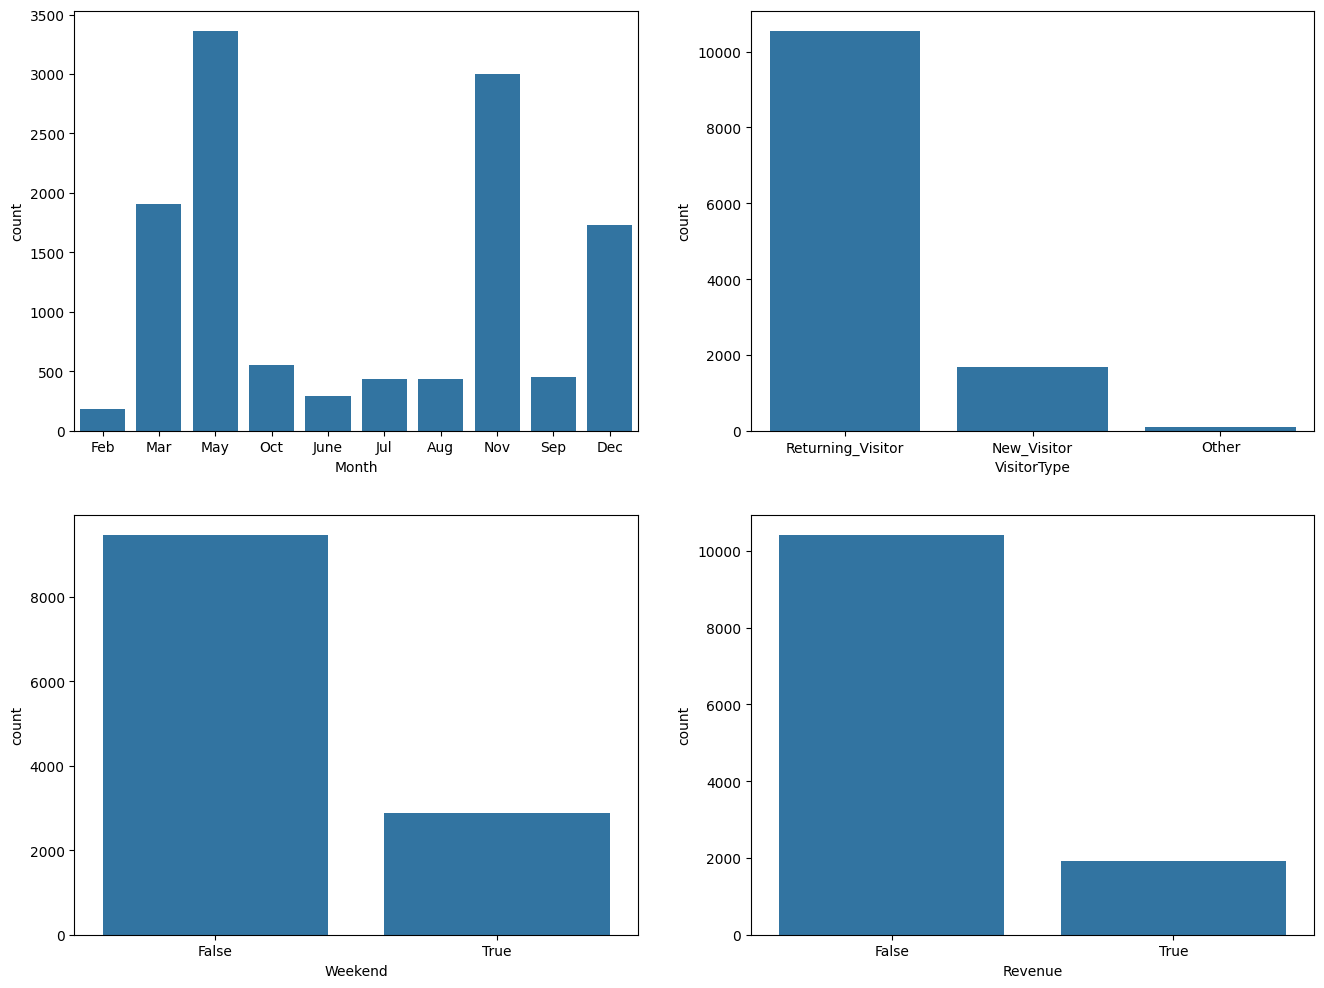

In [36]:
# countplot of each categorical column

cat_cols=['Month','VisitorType','Weekend','Revenue']

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
    index += 1
plt.show()

In [82]:
df[['Weekend','Revenue']].value_counts()

Weekend  Revenue
False    False      8053
True     False      2369
False    True       1409
True     True        499
Name: count, dtype: int64

Revenue generated on weekend is very less

In [88]:
df['BounceRates'].nunique()

1872

**Bivariate Analysis**

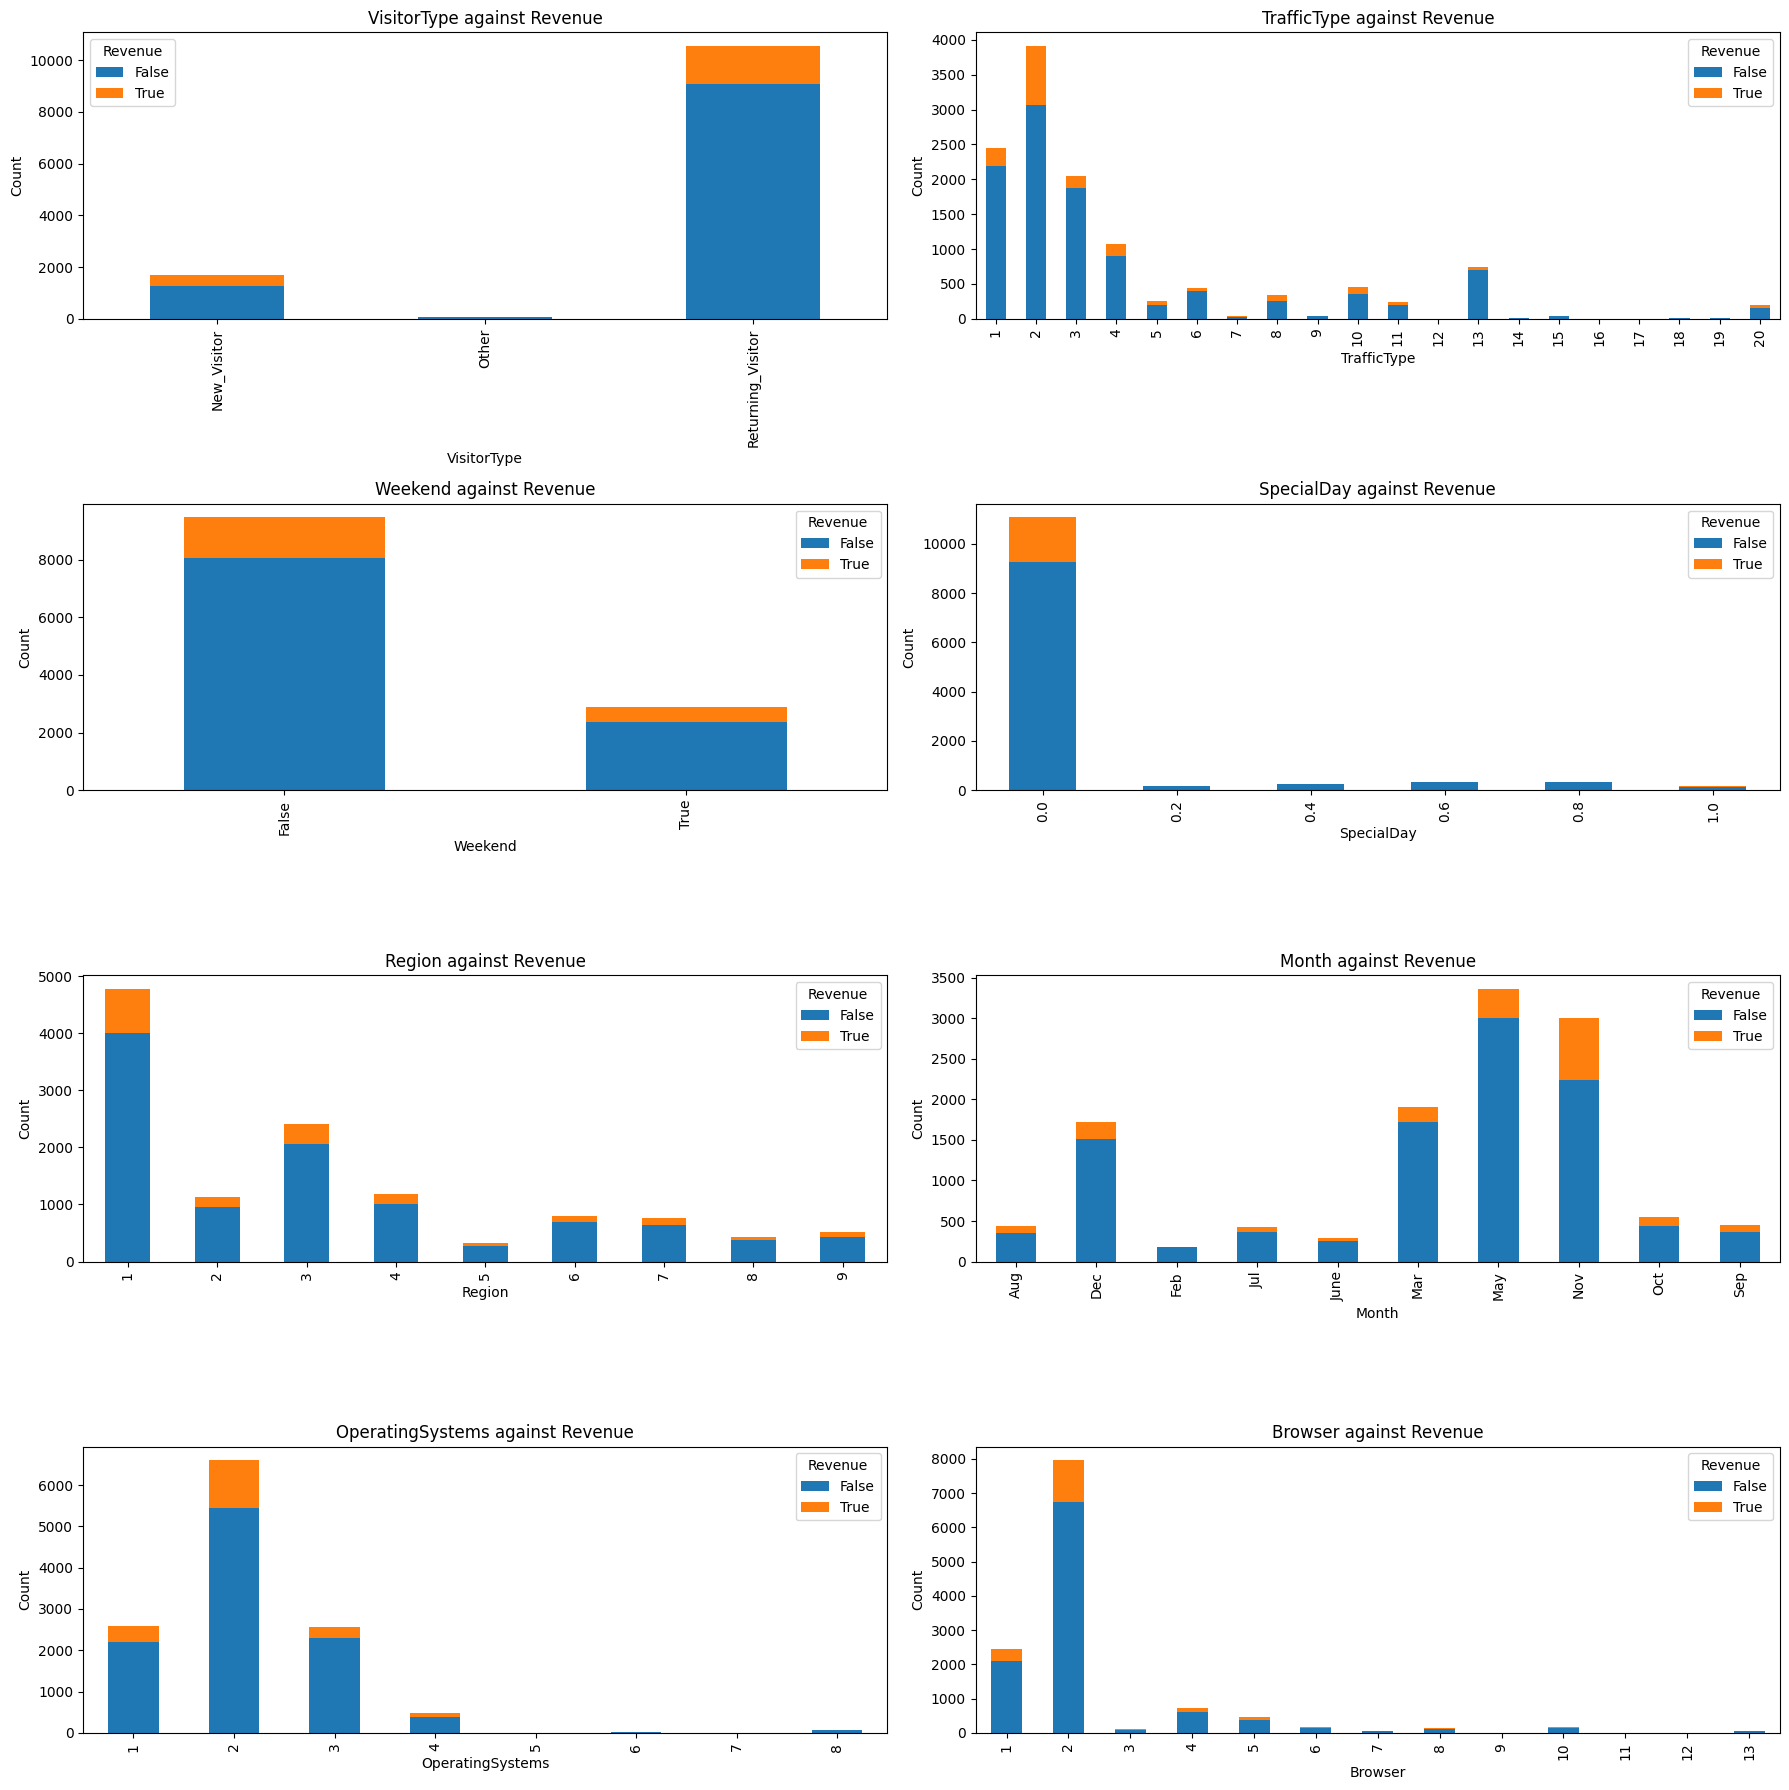

In [141]:
# Graphical relations between different categories wrt to Revenue
# stacked Bar plot
columns = ['VisitorType','TrafficType', 'Weekend', 'SpecialDay', 'Region', 'Month','OperatingSystems','Browser']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(columns):
    grouped_df = df.groupby([col, 'Revenue']).size().unstack(fill_value=0)
    grouped_df.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} against Revenue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()    
plt.show()


1. New vistor likely purchase more compared to Returning Visitor
2. TraficType 2 has highest foot fall with higher purchase conversion
3. Weekdays has more foot fall and higher conversion compare to weekend
4. Footfall / Purchase happening near to special days or any offer days
5. Region no 1 has more trafic and purchase conversion.
6. Nov, Dec has highest no of visitors and purchase conversion compare to other months
7. Most user used operating system type 2 for visit and transaction completion
8. Most using type 2 browser for purchases 

In [69]:
df[['Administrative','Informational','ProductRelated']].nunique()

Administrative     27
Informational      17
ProductRelated    311
dtype: int64

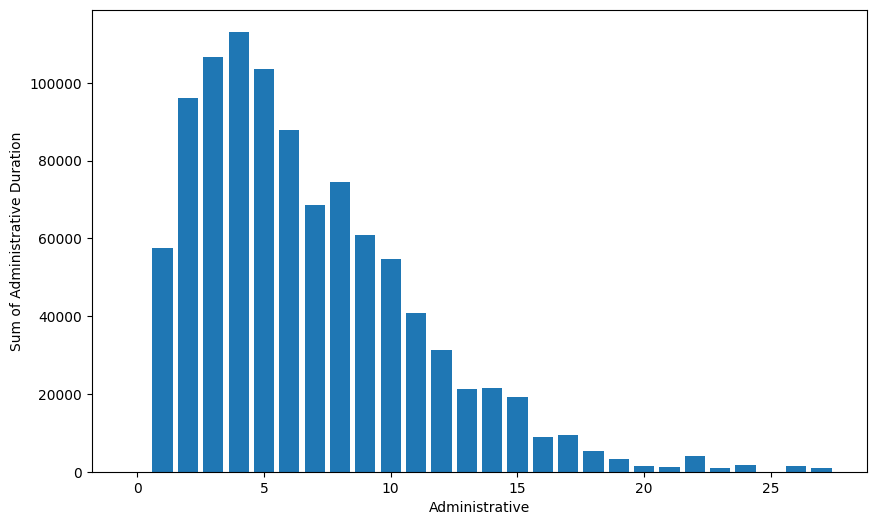

In [70]:
grouped_df = df.groupby('Administrative')['Administrative_Duration'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Administrative'], grouped_df['Administrative_Duration'])
plt.xlabel('Administrative')
plt.ylabel('Sum of Administrative Duration')
plt.show()

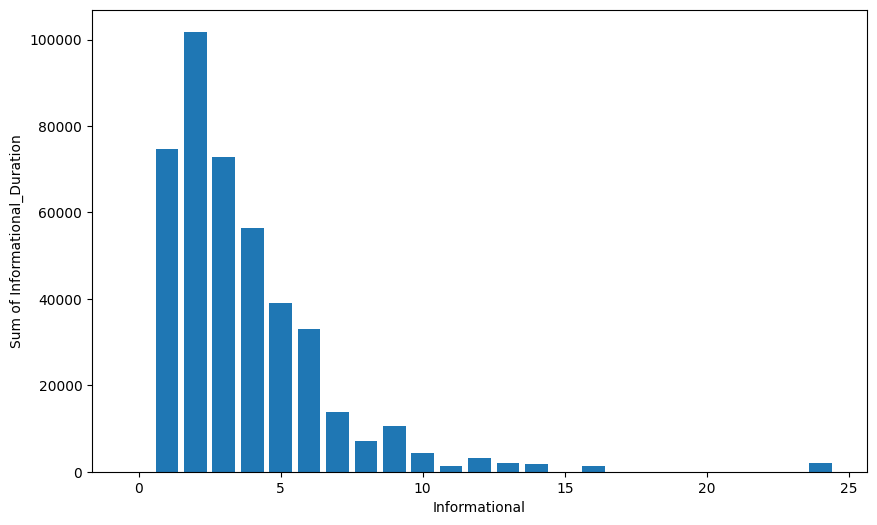

In [83]:
grouped_df = df.groupby('Informational')['Informational_Duration'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Informational'], grouped_df['Informational_Duration'])
plt.xlabel('Informational')
plt.ylabel('Sum of Informational_Duration')
plt.show()

**Multivariate Analysis**

In [104]:
col1=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Revenue']
col = df.columns
u=df.nunique()

df1=df[df["Revenue"]==True]
df2=df[df["Revenue"]==False]
df3=dft.nunique()
df4=dff.nunique()
for i in col1:
    print("Total Unique in {0} is {1}. For Revenue, False= {2}, True= {3} ".format(i,u[i],df4[i],df3[i]))


Total Unique in Administrative is 27. For Revenue, False= 26, True= 23 
Total Unique in Administrative_Duration is 3335. For Revenue, False= 2689, True= 1037 
Total Unique in Informational is 17. For Revenue, False= 17, True= 12 
Total Unique in Informational_Duration is 1258. For Revenue, False= 1009, True= 426 
Total Unique in ProductRelated is 311. For Revenue, False= 274, True= 225 
Total Unique in ProductRelated_Duration is 9551. For Revenue, False= 7877, True= 1879 
Total Unique in BounceRates is 1872. For Revenue, False= 1595, True= 536 
Total Unique in ExitRates is 4777. For Revenue, False= 4005, True= 1136 
Total Unique in PageValues is 2704. For Revenue, False= 1192, True= 1518 
Total Unique in SpecialDay is 6. For Revenue, False= 6, True= 6 
Total Unique in OperatingSystems is 8. For Revenue, False= 8, True= 8 
Total Unique in Browser is 13. For Revenue, False= 13, True= 12 
Total Unique in Region is 9. For Revenue, False= 9, True= 9 
Total Unique in TrafficType is 20. For R

**Corelation Matrix**

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

<Axes: >

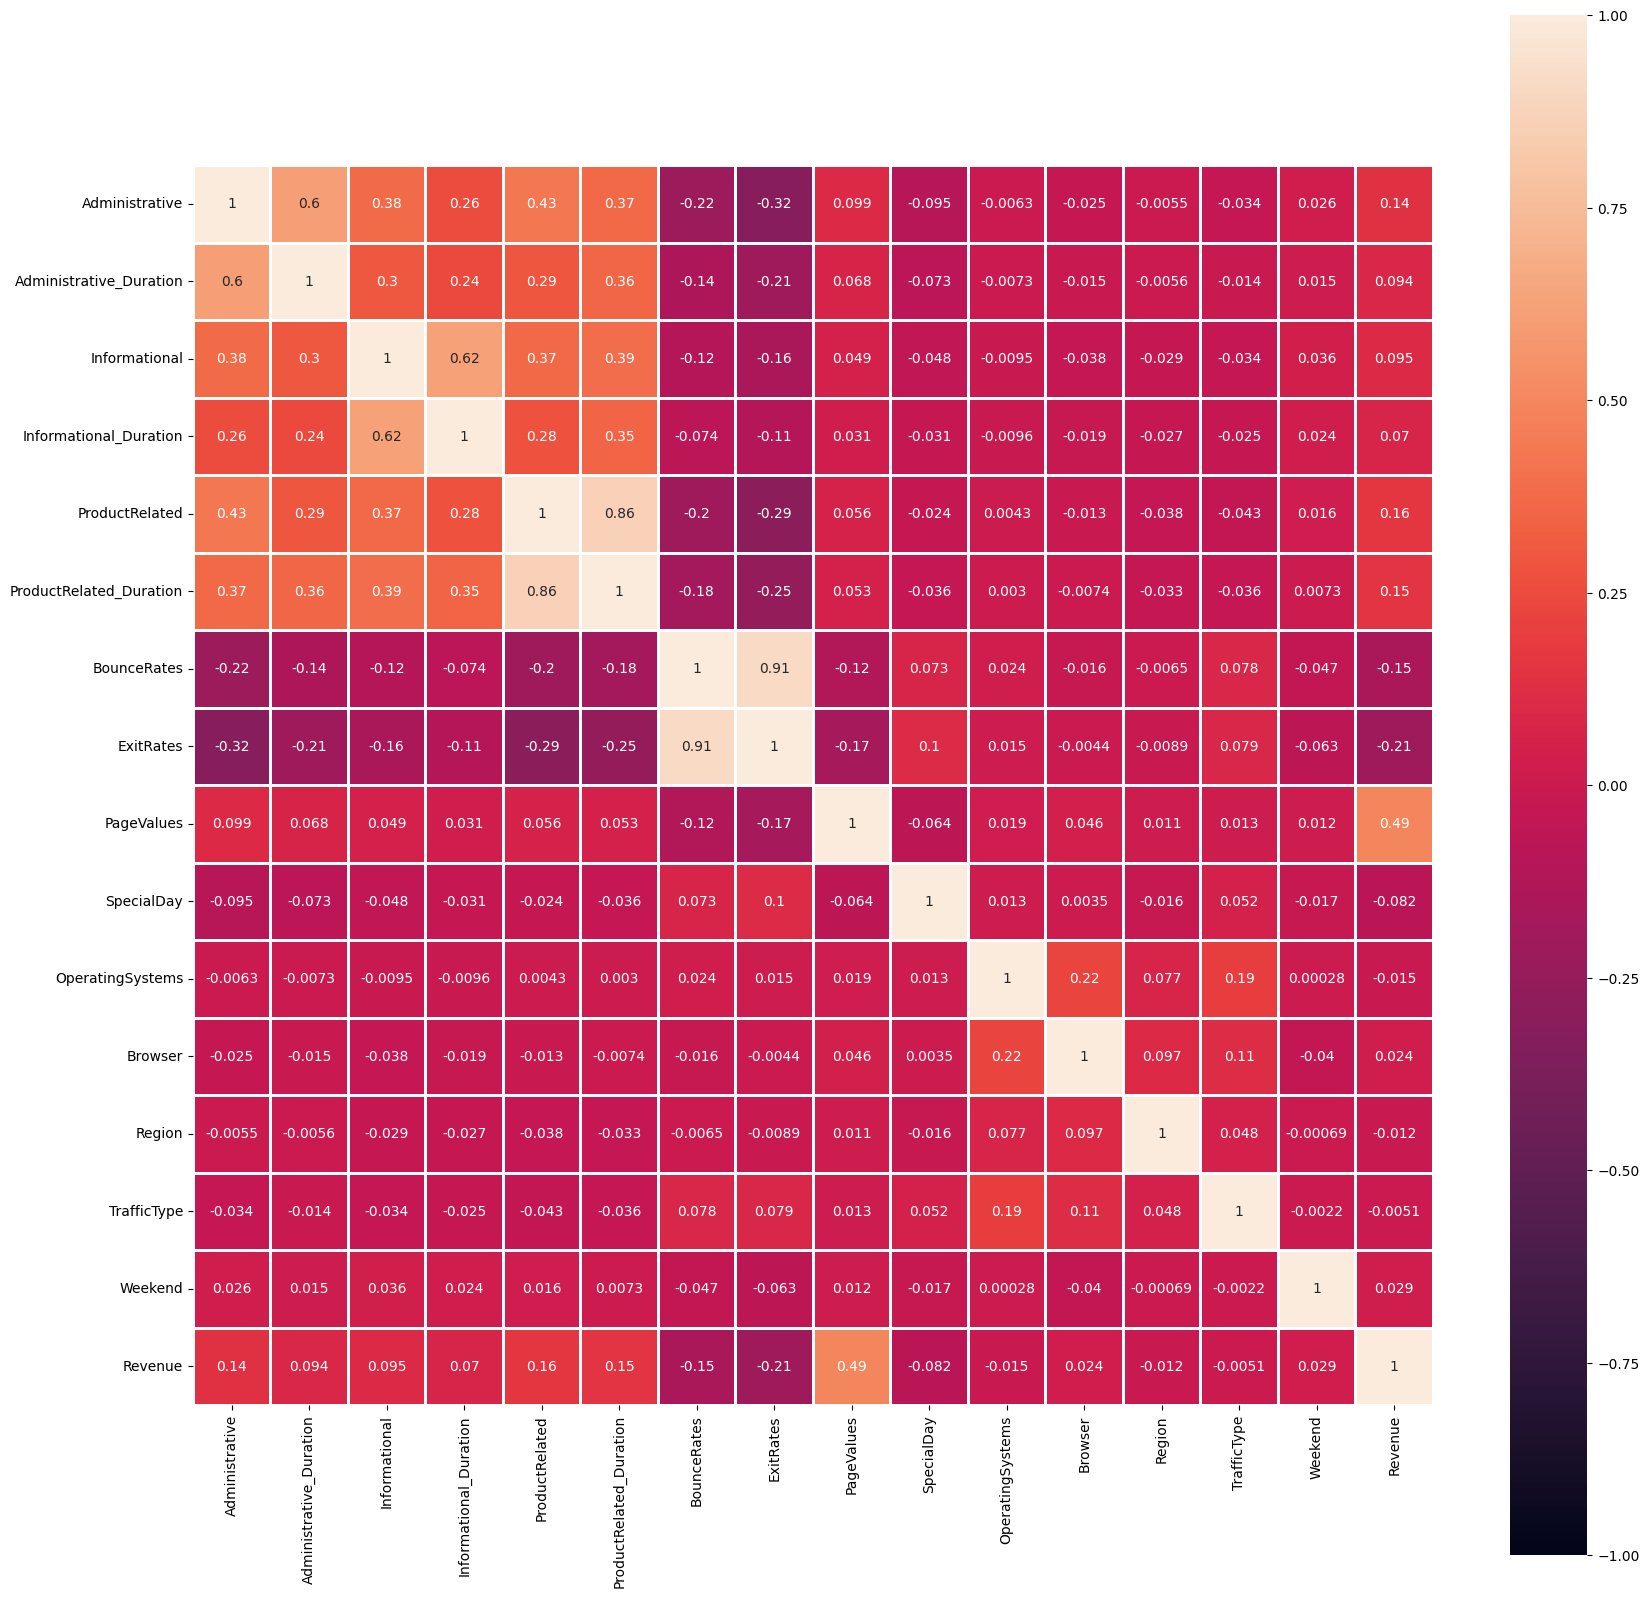

In [111]:
df_numeric = df.select_dtypes(include=[float, int, bool])
corrMatrix = df_numeric.corr()
print(corrMatrix)
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(1,1,1)
z=sns.heatmap(corrMatrix, annot=True, linewidths=1, vmin=-1, vmax=1, square = True)
z

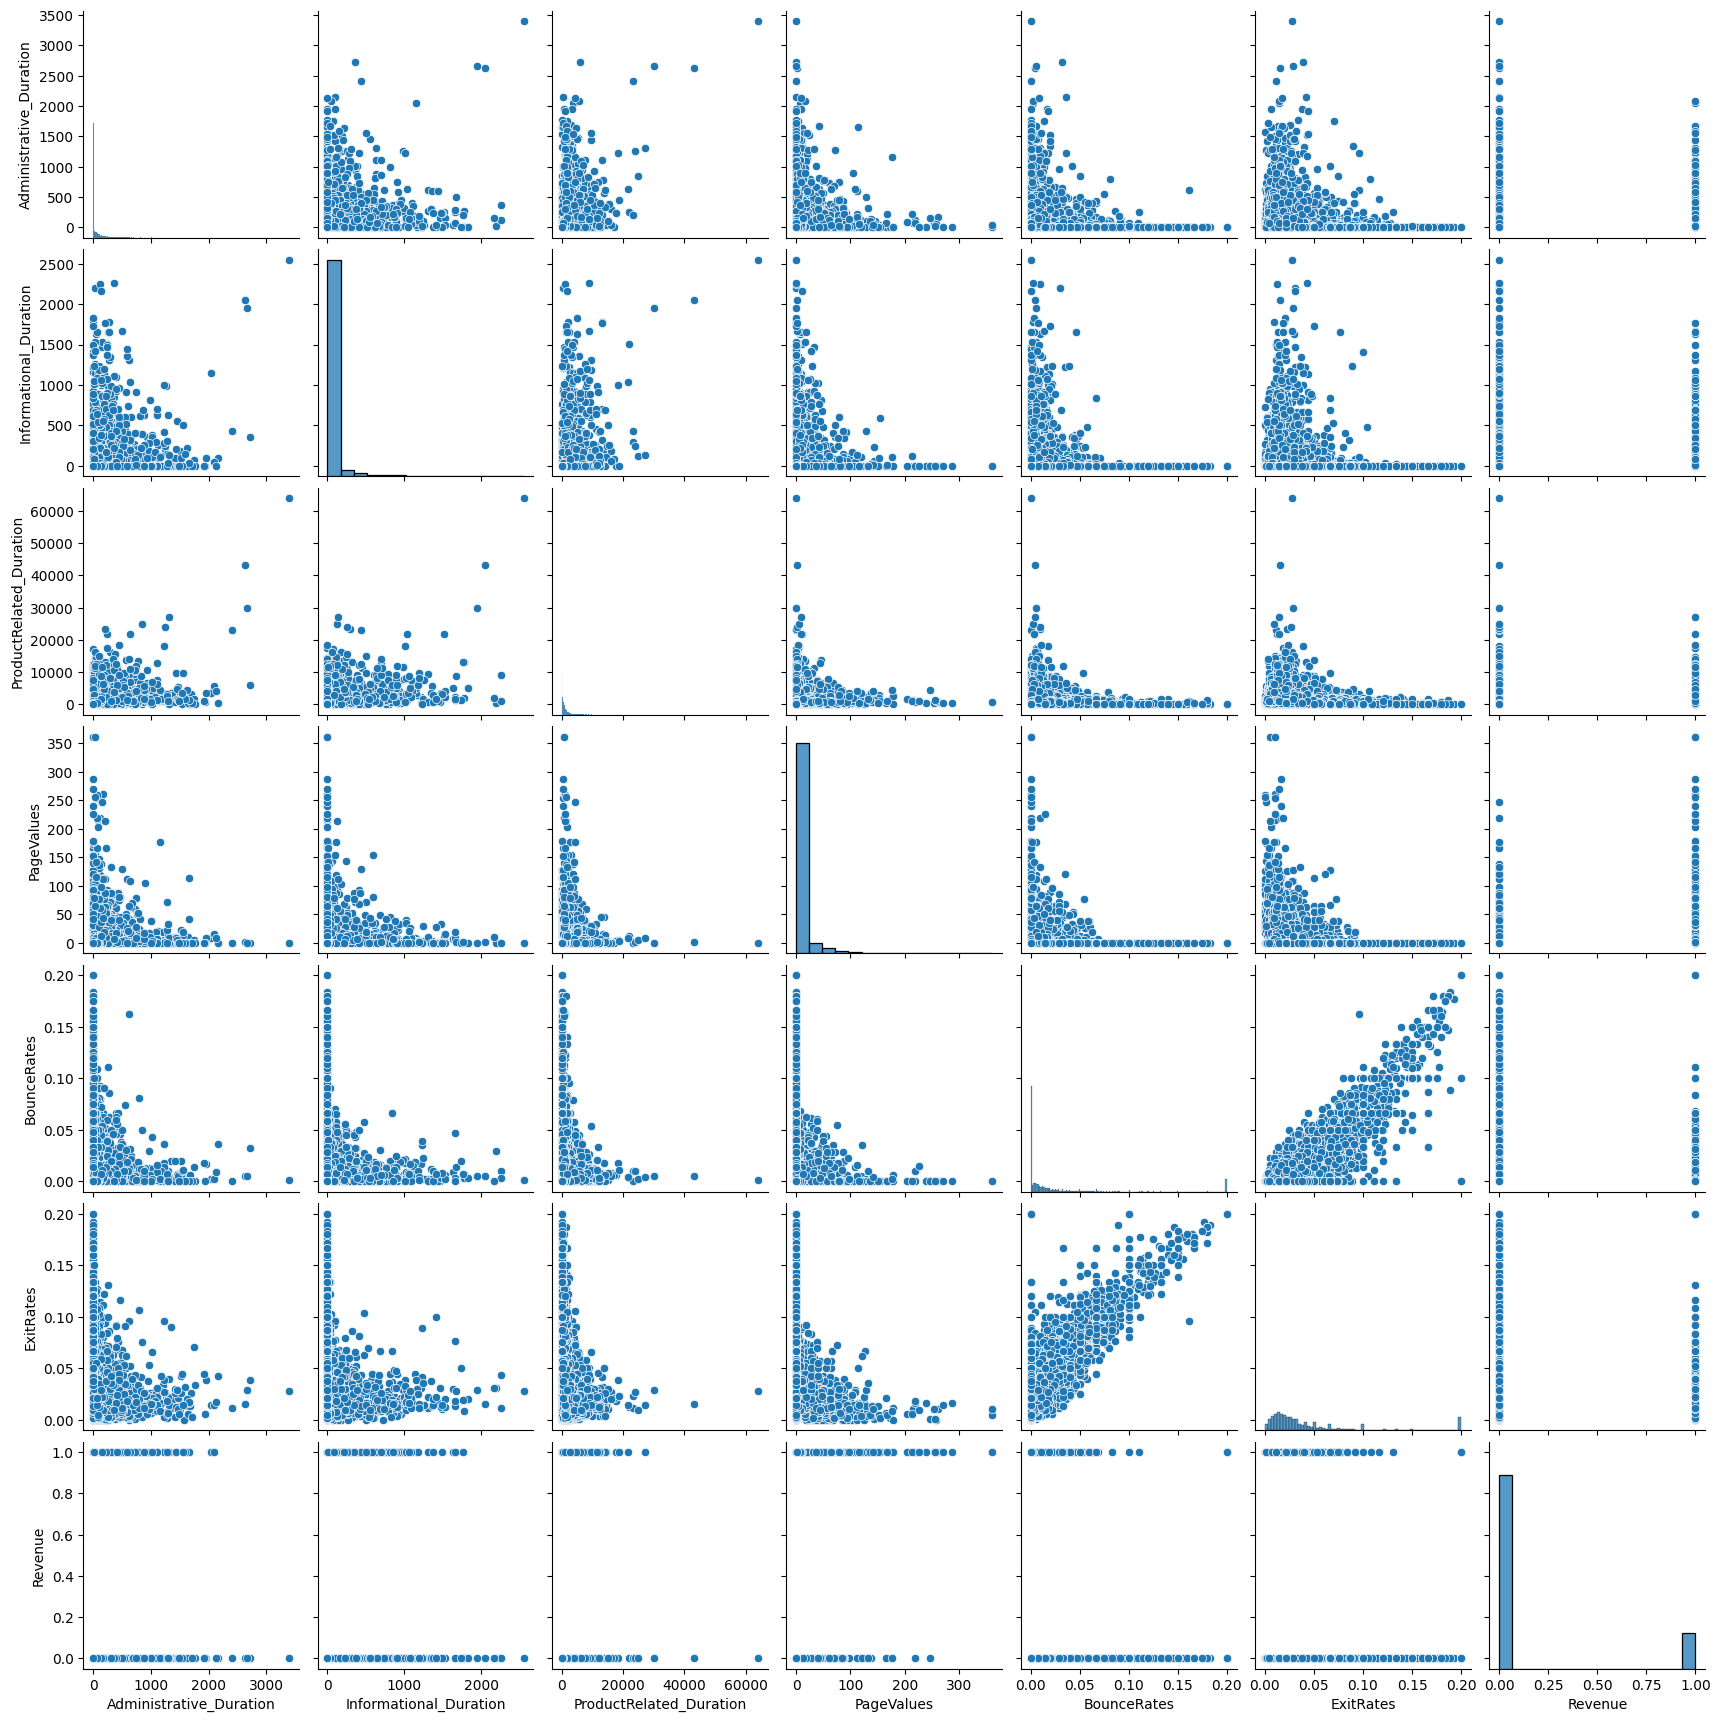

In [116]:
# pairplot for numerical categories to Revenue relationship

sns.pairplot(df, vars=num_cols + ['Revenue'])
plt.show()

**Generate a binary feature indicating whether the user visited all three page categories.**

In [128]:
#Creating a new column defining the user visit for all 3 categories

df['Visited_All_Categories'] = ((df['Administrative'] > 0) & (df['Informational'] > 0) & (df['ProductRelated'] > 0))

print(df[['Administrative', 'Informational', 'ProductRelated', 'Visited_All_Categories']])

#FIltering users who have visitied all 3 categories
filtered_df = df[df['Visited_All_Categories'] == 1]
filtered_df

       Administrative  Informational  ProductRelated  Visited_All_Categories
0                   0              0               1                   False
1                   0              0               2                   False
2                   0              0               1                   False
3                   0              0               2                   False
4                   0              0              10                   False
...               ...            ...             ...                     ...
12325               3              0              53                   False
12326               0              0               5                   False
12327               0              0               6                   False
12328               4              0              15                   False
12329               0              0               3                   False

[12330 rows x 4 columns]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Session_Length,Visited_All_Categories
29,1,6.000000,1,0.00,45,1582.750000,0.043478,0.050821,54.179764,0.4,Feb,3,2,1,1,Returning_Visitor,False,False,1588.750000,True
57,4,56.000000,2,120.00,36,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False,1174.741667,True
103,2,31.000000,1,16.00,36,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False,2130.530952,True
109,6,326.250000,4,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False,5482.463753,True
161,2,58.000000,2,22.00,31,829.166667,0.030303,0.040606,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,True,False,909.166667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,8,167.910714,6,547.75,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False,7055.813095,True
12307,2,305.125000,3,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False,1794.625000,True
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True,4838.739571,True
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True,11590.358383,True


**Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region.**

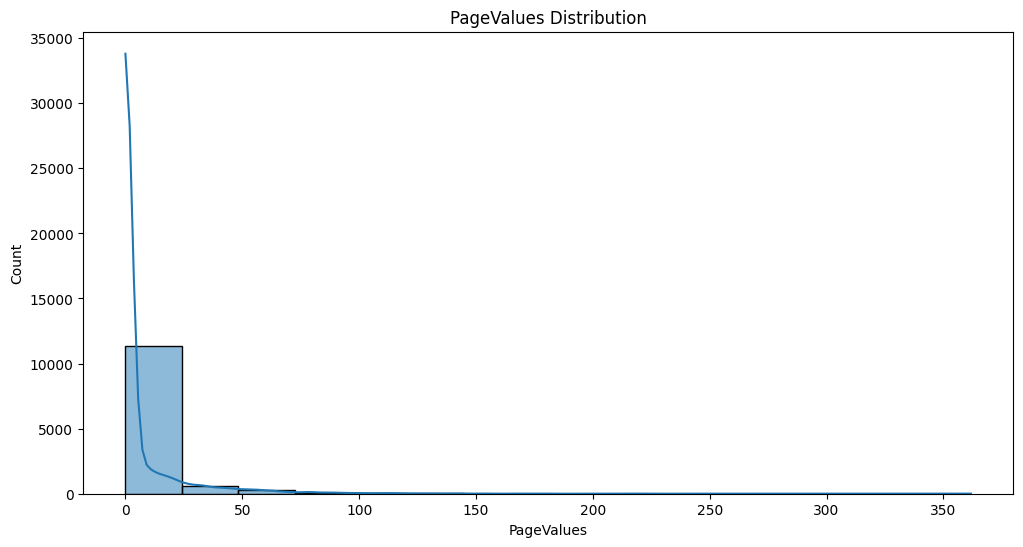

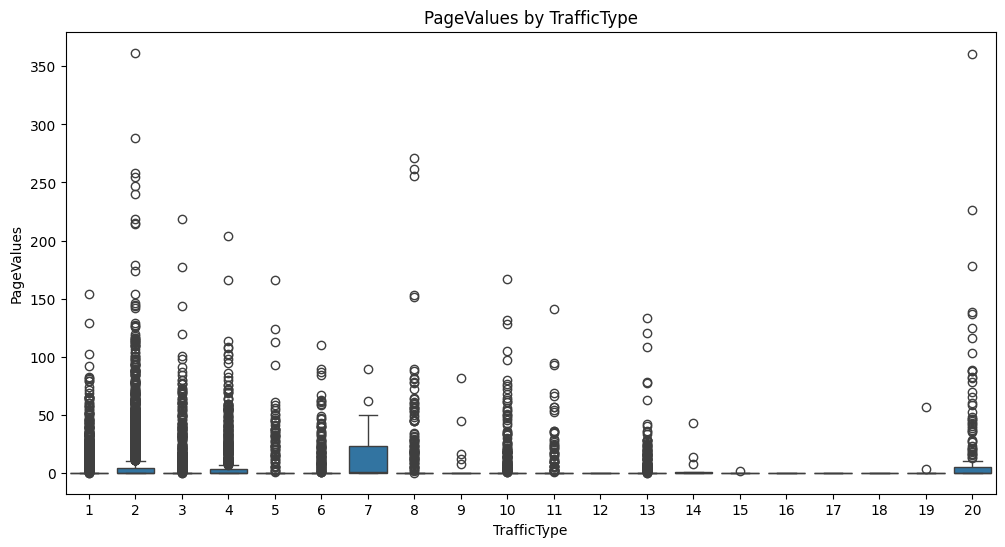

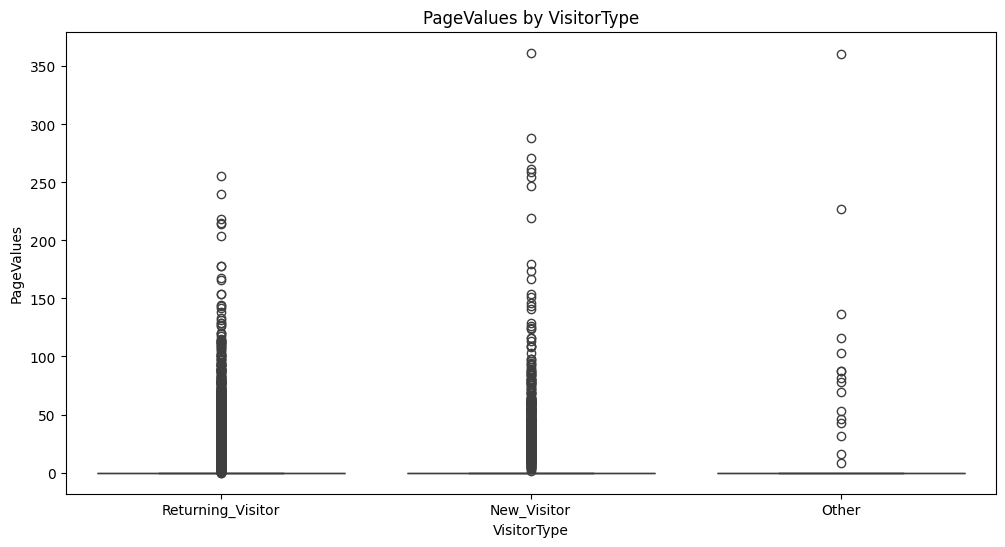

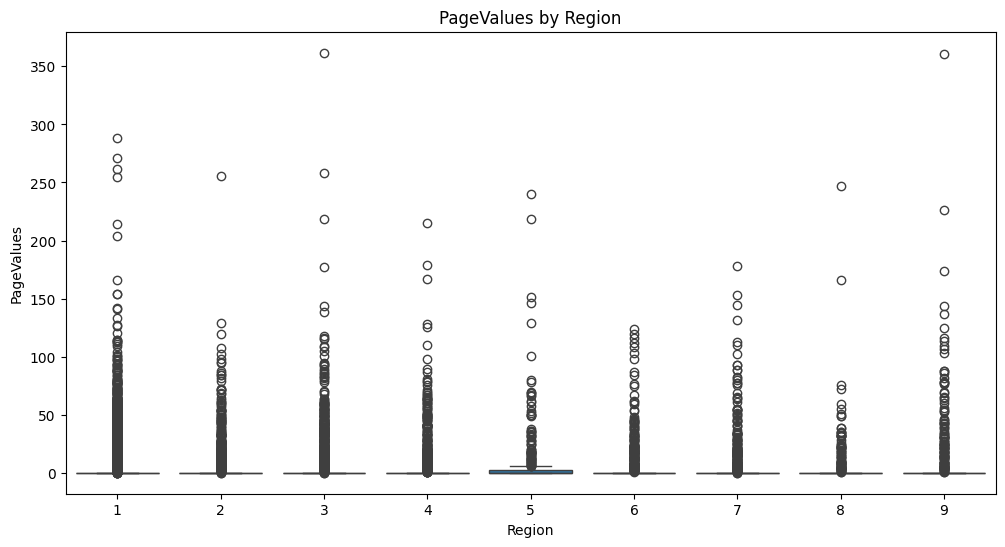

In [122]:
#PageValues distribution
plt.figure(figsize=(12, 6))
plt.title('PageValues Distribution')
sns.histplot(df['PageValues'], kde=True)
plt.show()

# Exploring the relationship with TrafficType
plt.figure(figsize=(12, 6))
sns.boxplot(x='TrafficType', y='PageValues', data=df)
plt.title('PageValues by TrafficType')
plt.show()

# Exploring the relationship with VisitorType
plt.figure(figsize=(12, 6))
sns.boxplot(x='VisitorType', y='PageValues', data=df)
plt.title('PageValues by VisitorType')
plt.show()

# Exploring the relationship with Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='PageValues', data=df)
plt.title('PageValues by Region')
plt.show()

**Investigate user session lengths and their impact on conversion rates**

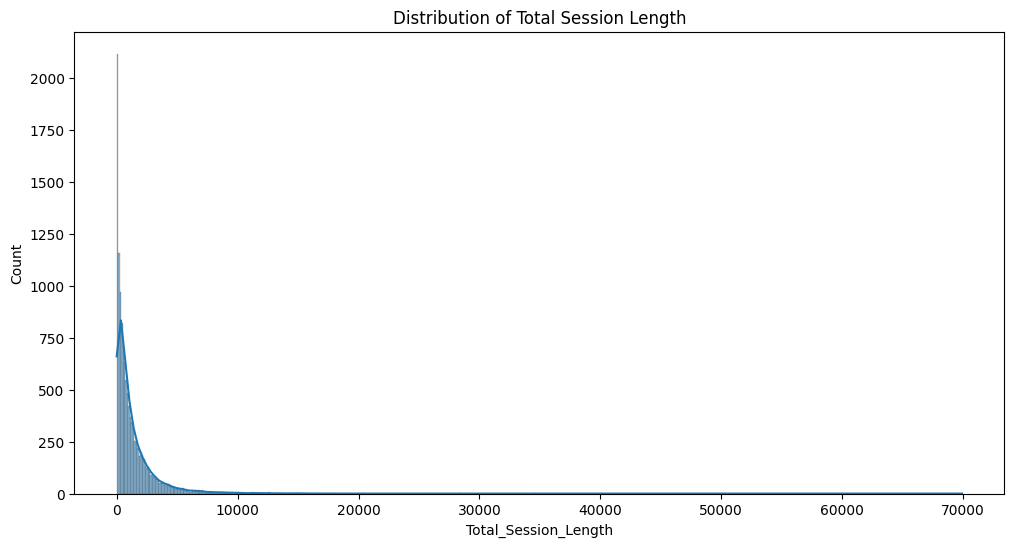

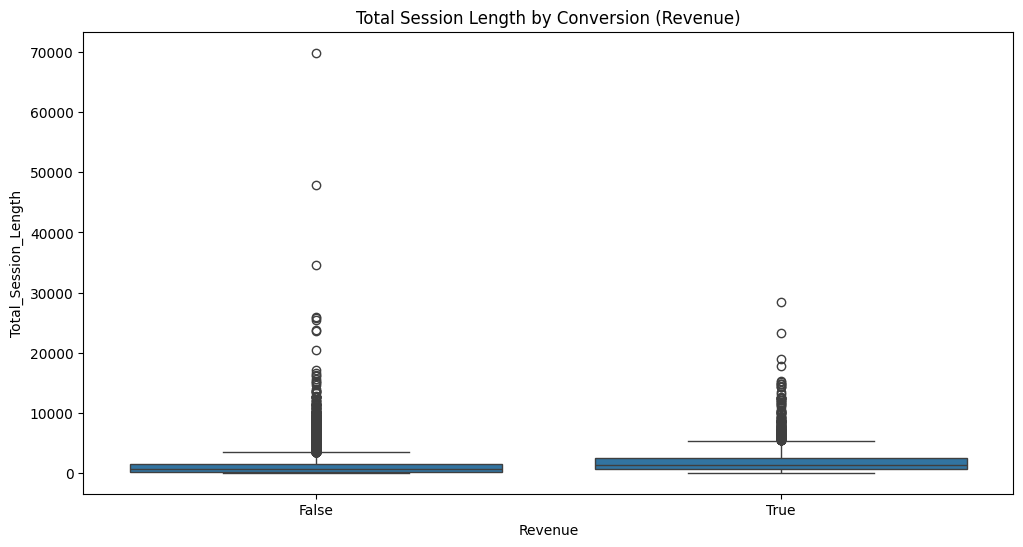

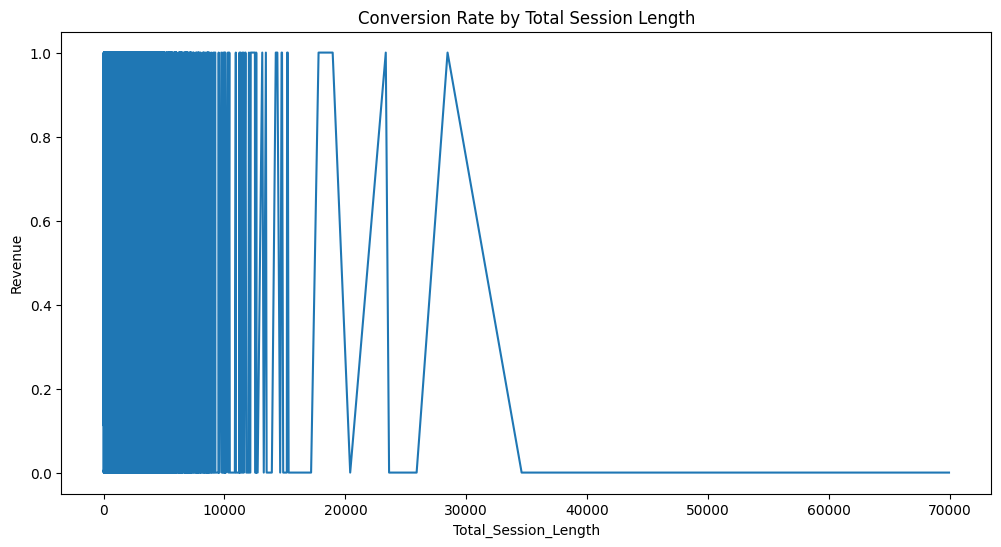

In [124]:
# Total session length
df['Total_Session_Length'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

# Distribution of Total Session Length
plt.figure(figsize=(12, 6))
sns.histplot(df['Total_Session_Length'], kde=True)
plt.title('Distribution of Total Session Length')
plt.show()

# Impact on conversion rates
plt.figure(figsize=(12, 6))
sns.boxplot(x='Revenue', y='Total_Session_Length', data=df)
plt.title('Total Session Length by Conversion (Revenue)')
plt.show()

# Conversion rates (Revenue= True)
conversion_rate_by_session_length = df.groupby('Total_Session_Length')['Revenue'].mean().reset_index()

#Conversion Rate Vs Total Session Length relationship
plt.figure(figsize=(12, 6))
sns.lineplot(x='Total_Session_Length', y='Revenue', data=conversion_rate_by_session_length)
plt.title('Conversion Rate by Total Session Length')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Session_Length', y='Revenue', data=conversion_rate_by_session_length)
plt.title('Conversion Rate by Total Session Length')
plt.show()

**Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.**


In [133]:
# grouping data by VisitorType, OperatingSystems, Region to all other attribute ,
#conversion rate(Revenue= True)

groupeduser = df.groupby(['VisitorType', 'OperatingSystems', 'Region']).agg({'Administrative': 'mean',
                                                                        'Administrative_Duration': 'mean',
                                                                        'Informational': 'mean',
                                                                        'Informational_Duration': 'mean',
                                                                        'ProductRelated': 'mean',
                                                                        'ProductRelated_Duration': 'mean',
                                                                        'BounceRates': 'mean',
                                                                        'ExitRates': 'mean',
                                                                        'PageValues': 'mean',
                                                                        'SpecialDay': 'mean',
                                                                        'Revenue': 'mean'}).reset_index()

groupeduser

,VisitorType,OperatingSystems,Region,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,New_Visitor,1,1,2.127168,83.730131,0.317919,9.577360,13.242775,458.403005,0.009835,0.026475,10.740777,0.035838,0.265896
1,New_Visitor,1,2,2.048780,62.360569,0.243902,12.685366,11.853659,508.990765,0.007214,0.030134,8.827076,0.014634,0.341463
2,New_Visitor,1,3,3.149425,114.667813,0.436782,20.024521,14.413793,486.277128,0.007632,0.022825,4.819538,0.006897,0.149425
3,New_Visitor,1,4,2.027027,103.591892,0.189189,3.378378,12.486486,465.826441,0.007870,0.025108,15.363550,0.000000,0.297297
4,New_Visitor,1,5,2.333333,68.516667,0.000000,0.000000,9.666667,354.758333,0.034848,0.045864,47.873485,0.066667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Returning_Visitor,8,4,0.000000,0.000000,0.000000,0.000000,3.000000,955.750000,0.000000,0.075000,0.000000,0.000000,0.000000
111,Returning_Visitor,8,5,0.000000,0.000000,0.000000,0.000000,9.000000,87.916667,0.000000,0.003175,0.000000,0.000000,0.000000
112,Returning_Visitor,8,6,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000
113,Returning_Visitor,8,7,0.000000,0.000000,0.000000,0.000000,2.000000,17.000000,0.000000,0.100000,0.000000,0.000000,0.000000


**Segment users based on TrafficType and analyze their engagement patterns and purchase probability.**

    TrafficType  Total_Session_Length  Administrative_Duration  \
0             1           1323.179995                65.726273   
1             2           1618.966549               105.948043   
2             3            968.376058                56.276246   
3             4           1094.823081                75.264396   
4             5            868.345872               106.858500   
5             6           1239.185990                69.740664   
6             7           1150.599718                85.339598   
7             8           1229.413699               103.662376   
8             9            645.049721                67.793651   
9            10           1365.233061                76.523634   
10           11            981.760754                62.513994   
11           12             15.000000                 0.000000   
12           13           1357.620852                67.844474   
13           14           4667.301985               277.147741   
14        

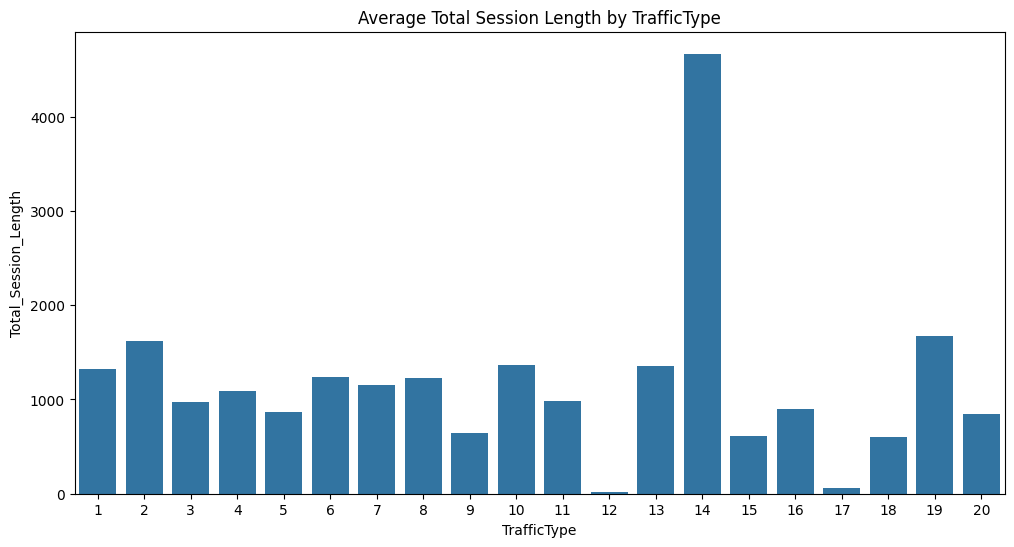

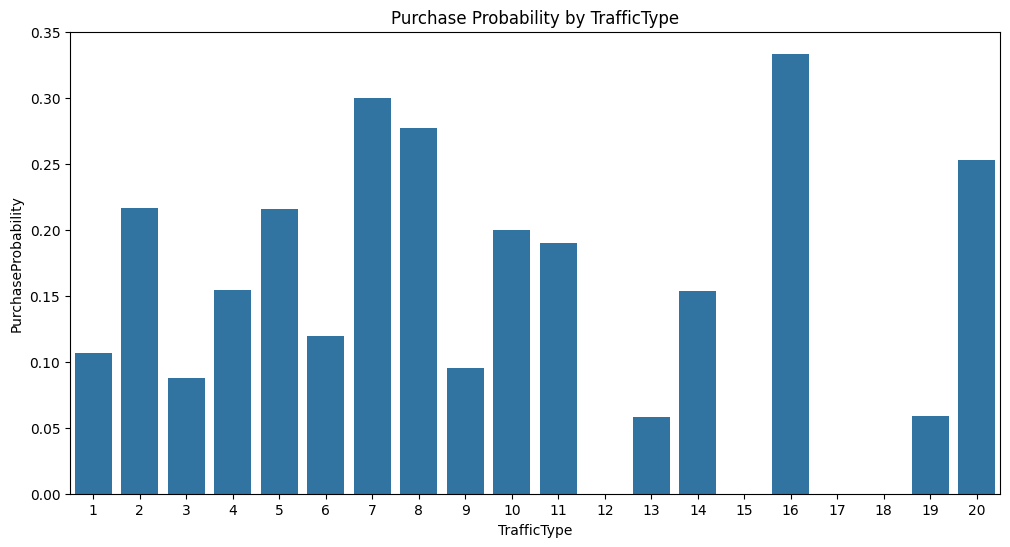

In [136]:
# Group by TrafficType

groupedtrafic = df.groupby('TrafficType').agg({
                                                'Total_Session_Length': 'mean',
                                                'Administrative_Duration': 'mean',
                                                'Informational_Duration': 'mean',
                                                'ProductRelated_Duration': 'mean',
                                                'Revenue': 'mean'}).reset_index()

# Rename Revenue column to PurchaseProbability for clarity
groupedtrafic.rename(columns={'Revenue': 'PurchaseProbability'}, inplace=True)

print(groupedtrafic)

# Visualize engagement patterns
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='Total_Session_Length', data=groupedtrafic)
plt.title('Average Total Session Length by TrafficType')
plt.show()

# Visualize purchase probability
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='PurchaseProbability', data=groupedtrafic)
plt.title('Purchase Probability by TrafficType')
plt.show()